In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # Import the ticker module

In [112]:
our_color_palette = {"WT": "#F2C14E", # yellow
                     "W": "#F2C14E", # yellow
                     "IP": "#79ADDC", # blue
                     "I": "#79ADDC", # blue
                     "KO": "#B279A7", # purple
                     "K": "#B279A7", # purple
                    } 
treatments_list = ["W", "I", "K"]
passages_list = ["p1", "p2", "p3", "p5", "p10"]
replicates_list = ['a', 'b', 'c']

## load diversity for cgamp-sting study

In [113]:
df = pd.read_csv('../../results_summary/all_snpgenie_population_summary.csv')

df['genotype'] = df['passage'].str.split("_").str[0]
df['rep'] = df['passage'].str.split("_").str[-1]
df['passage'] = df['passage'].str.split("_").str[1].str.split('p').str[-1].astype(float)

df = df[df['virus']=='DCV']

In [114]:
# get parental values
p0_dcv_pi = df[(df['genotype']=='parental') & (df['virus']=='DCV') ]['pi'].values[0]

In [115]:
df.loc[df['genotype']=='parental', 'genotype'] ='W'

In [116]:
df = df[['pi','genotype','rep','passage']]

## load numbers from dicer study

In [117]:
df_dicer = pd.read_csv('../../results_summary/dcv_dicer_study_WT_snpgenie_population_summary.csv')
df_dicer = df_dicer[df_dicer['genotype']=='wild_type']
df_dicer['genotype'] = 'W'
df_dicer['rep'] = df_dicer['replicate']

map_passage = {"passage_1": -10, "passage_5": -5, "passage_10": -1}
df_dicer['passage'] = df_dicer['passage'].apply(lambda x: map_passage[x])
df_dicer = df_dicer[['pi','genotype','rep','passage']]

In [118]:
df_dicer

,pi,genotype,rep,passage
0,0.000112,W,replicate_c,-1
1,0.000177,W,replicate_b,-10
2,0.000399,W,replicate_e,-1
3,0.000281,W,replicate_a,-10
4,0.000080,W,replicate_c,-5
5,0.000190,W,replicate_a,-5
6,0.000307,W,replicate_d,-5
7,0.000097,W,replicate_d,-10
8,0.000396,W,replicate_e,-5
9,0.000132,W,replicate_a,-1


## merge dataframes

In [119]:
df = pd.concat([df, df_dicer])

## plot

In [120]:
df['passage'].unique()

array([  0.,   1.,   2.,   3.,   5.,  10.,  -1., -10.,  -5.])

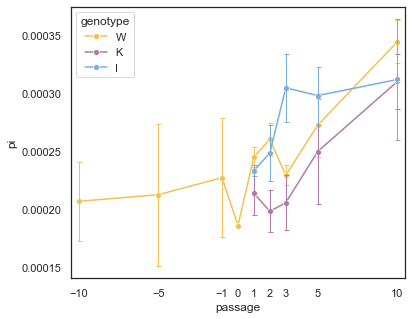

In [86]:
sns.set(rc={'figure.figsize':(6,5)})
sns.set_style('white')

g = sns.lineplot(df, 
                x='passage', 
                y='pi', 
                hue='genotype', 
                marker='o', 
                err_style="bars",
                #linestyle='--',
                #dodge=0.25,
                errorbar='se',
                err_kws={"elinewidth": 1., "capsize": 2.5},
                #errwidth=1.1, 
                #capsize=0.1,
                palette=our_color_palette, 
                )

plt.xlim(df['passage'].min()-0.5, df['passage'].max()+0.5)
plt.xticks(sorted(df['passage'].unique()))


plt.show()

g.figure.savefig("/Users/lfuhrmann/Downloads/dcv_pi.pdf")

## check for pis and piN 

In [121]:
df_dicer = pd.read_csv("../../results_summary/dcv_dicer_study_WT_snpgenie_codon_results.csv")
df_dicer = df_dicer[df_dicer['genotype']=='wild_type']
df_dicer['genotype'] = 'W'
df_dicer['rep'] = df_dicer['replicate']
df_dicer['passage'] = df_dicer['passage'].apply(lambda x: map_passage[x])
df_dicer = df_dicer[['S_diffs', 'N_diffs', 'S_sites', 'N_sites', 'genotype','rep','passage']]

In [122]:
fname = "../../results_summary/all_snpgenie_codon_results.csv"
df = pd.read_csv(fname)

df = df[df['virus']=='DCV']

df['genotype'] = df['passage'].str.split("_").str[0]
df['rep'] = df['passage'].str.split("_").str[-1]
df['passage'] = df['passage'].str.split("_").str[1].str.split("p").str[-1].astype(int)
df.loc[df['genotype']=='parental', 'genotype'] ='W'

df = df[['S_diffs', 'N_diffs', 'S_sites', 'N_sites', 'genotype','rep','passage']]

In [123]:
# merge dataframes 

df = pd.concat([df, df_dicer])

In [124]:
# per codon measurement

# piS: The mean number of pairwise synonymous differences per synonymous site in this product.
df['piS'] = df['S_diffs']/df['S_sites']

# piN: The mean number of pairwise nonsynonymous differences per nonsynonymous site in this product.
df['piN'] = df['N_diffs']/df['N_sites']

In [125]:
df = df.groupby(by=['genotype', 'rep', 'passage']).mean().reset_index()
df = df[['genotype', 'rep', 'passage', 'piS', 'piN']]

In [126]:
df_long= pd.wide_to_long(df, 
                        stubnames="pi",
                                      i=["genotype", "passage", "rep"],
                                      j="type",
                                      suffix="\D+",).reset_index()

In [127]:
df_long

,genotype,passage,rep,type,pi
0,I,1,a,S,0.000532
1,I,1,a,N,0.000069
2,I,2,a,S,0.000457
3,I,2,a,N,0.000082
4,I,3,a,S,0.000543
...,...,...,...,...,...
115,W,-10,replicate_e,N,0.000304
116,W,-5,replicate_e,S,0.000625
117,W,-5,replicate_e,N,0.000466
118,W,-1,replicate_e,S,0.000646


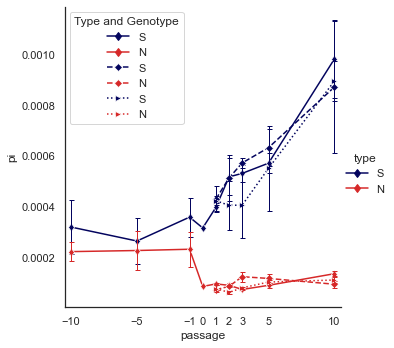

In [128]:
sns.set(rc={'figure.figsize':(6,5)})
sns.set_style('white')

g = sns.relplot(df_long[df_long['genotype']=='W'], 
                x='passage',
                kind='line',
                #col='genotype', 
                y='pi', 
                hue='type', 
                marker='d', 
                err_style="bars",
                #linestyle='--',
                #dodge=0.25,
                errorbar='se',
                err_kws={"elinewidth": 1., "capsize": 2.5},
                #errwidth=1.1, 
                #capsize=0.1,
                palette={"S": '#03045e', "N": '#d62828'}, 
                legend=True, 
                )

# Add plot for 'IP' genotype (dashed lines)
sns.lineplot(data=df_long[df_long['genotype']=='I'],
             x='passage',
             y='pi',
             hue='type',
             linestyle='--',
             err_style="bars",
             errorbar='se',
            err_kws={"elinewidth": 1., "capsize": 2.5},
             marker='D',
             palette={"S": '#03045e', "N": '#d62828'}, 
             ax=g.ax)

# Add plot for 'IP' genotype (dashed lines)
sns.lineplot(data=df_long[df_long['genotype']=='K'],
             x='passage',
             y='pi',
             hue='type',
             err_style="bars",
             errorbar='se',
            err_kws={"elinewidth": 1., "capsize": 2.5},
             linestyle=':',
             marker='>',
             palette={"S": '#03045e', "N": '#d62828'}, 
             ax=g.ax)

plt.xlim(df['passage'].min()-0.5, df['passage'].max()+0.5)
plt.xticks(sorted(df['passage'].unique()))

# Adjust legend to show both solid and dashed lines
handles, labels = g.ax.get_legend_handles_labels()
g.ax.legend(handles, labels, title='Type and Genotype')

plt.show()

g.figure.savefig("/Users/lfuhrmann/Downloads/dcv_pi.legend.pdf")

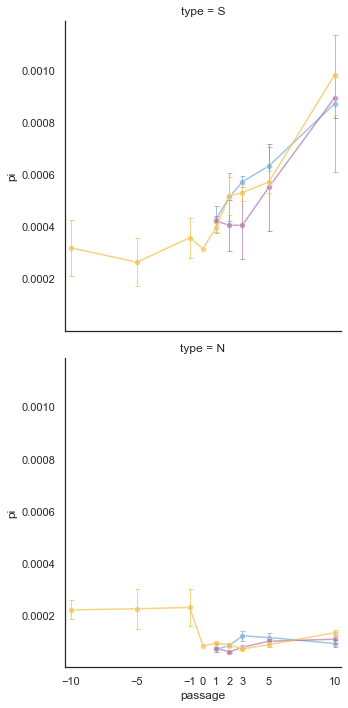

In [97]:
sns.set(rc={'figure.figsize':(6,10)})
sns.set_style('white')

g = sns.relplot(df_long, 
                x='passage',
                kind='line',
                row='type', 
                y='pi', 
                hue='genotype', 
                marker='o', 
                #linestyles='-',
                errorbar='se',
                err_style="bars",
                err_kws={"elinewidth": 1., "capsize": 2.5},
                palette=our_color_palette, 
                alpha=0.7, 
                legend=False, 
                )

plt.xlim(df['passage'].min()-0.5, df['passage'].max()+0.5)
plt.xticks(sorted(df['passage'].unique()))


plt.show()

g.figure.savefig("/Users/lfuhrmann/Downloads/dcv_piS_piN.pdf")
